In [1]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from tkinter import messagebox

In [2]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

In [3]:
def upload():
    imagepath = easygui.fileopenbox()
    cartoonify(imagepath)    

In [4]:
def cartoonify(imagepath):
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if image is None:
        print('can not find any image. Choose appropriate file')
        sys.exit()
    resized1 = cv2.resize(image, (960, 540))
    #Transforming an image to graysacle
    grayscaleimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized2 = cv2.resize(grayscaleimage, (960, 540))
    #Smoothening a grayscale image
    smoothgrayscale = cv2.medianBlur(grayscaleimage, 5)
    resized3 = cv2.resize(smoothgrayscale, (960, 540))
    #retrieving the edges of an image by using thresholding technique
    getedge = cv2.adaptiveThreshold(smoothgrayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2. THRESH_BINARY, 9, 9)
    resized4 = cv2.resize(getedge, (960, 540))
    #preparing a mask image
    #applying bilateral filter to remove noise and keep edge sharp as required 
    colorimage = cv2.bilateralFilter(image, 9, 360, 360)
    resized5 = cv2.resize(colorimage, (960, 540))
    #Giving a cartoon effect
    #masking edged image with our "Beautify" image
    cartoonimage = cv2.bitwise_and(colorimage, colorimage, mask = getedge)
    resized6 = cv2.resize(cartoonimage, (960, 540))
    #plotting the whole transition
    image2 = [resized1, resized2, resized3, resized4, resized5, resized6]
    fig, axes = plt.subplots(3, 2, figsize = (8, 8), subplot_kw = {'xticks': [], 'yticks': []}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image2[i], cmap = 'gray')
    save1=Button(top, text="Save cartoon image",command=lambda: save(resized6, imagepath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    plt.show()
        

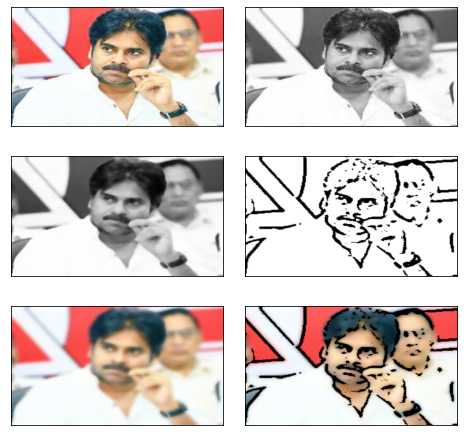

In [5]:
#save button
def save(resized6, imagepath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(imagepath)
    extension=os.path.splitext(imagepath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(resized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()    